In [59]:
import numpy as np 
from scipy import stats
import scikit_posthocs as sp
from statsmodels.stats.proportion import proportions_ztest

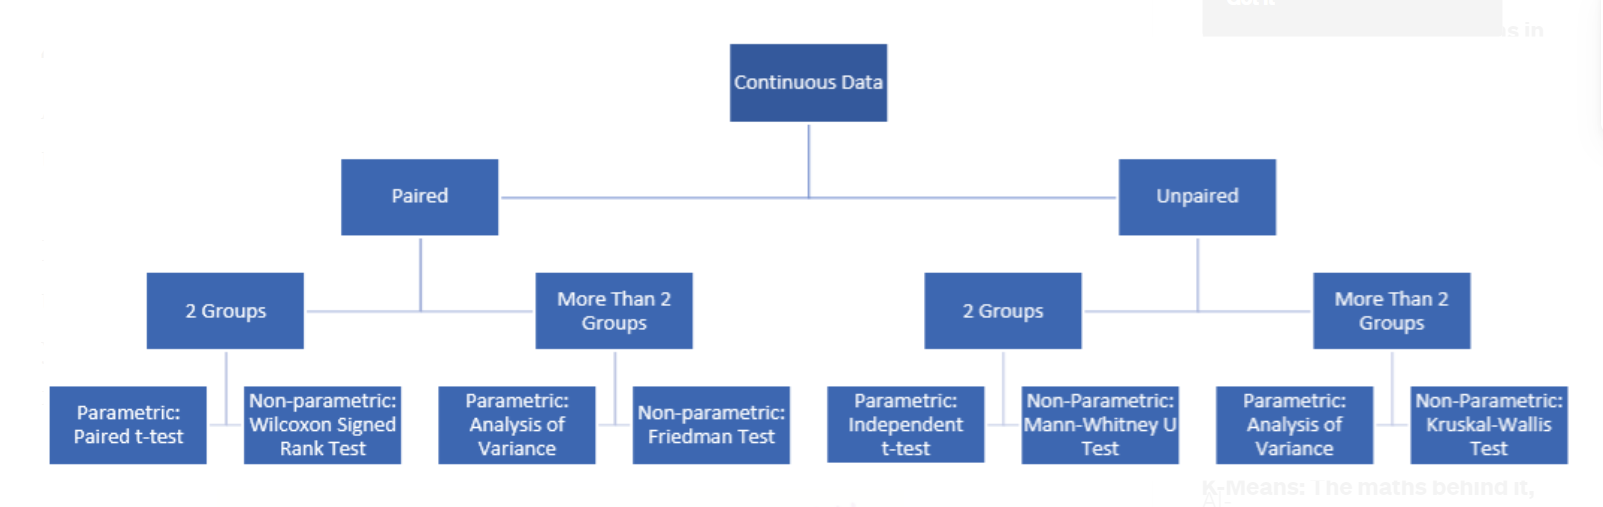

#### Assumption Check 

In [48]:
# H₀: The data is normally distributed.
# H₁: The data is not normally distributed.
def check_normality(data):
    test_stat_norm, p_value_norm=stats.shapiro(data)
    print("p value:%.4f" % p_value_norm)
    if p_value_norm <0.05:
        print("Reject null hypothesis-The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis-The data is normally distributed")

In [49]:
# H₀: The variances of the samples are the same.
# H₁: The variances of the samples are different.
def check_variance_homogeneity(group1, group2,*args):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis-The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis-The variances of the samples are same.")

#### t-test independent: Data is unpaired - Two Groups - parametric test

In [50]:
def t_test_independent(group1,group2):
    ttest,p_value = stats.ttest_ind(group1,group2)
    print("p value:%.8f" % p_value)
    print("since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:%.4f" %(p_value/2))
    if p_value/2 <0.05:
        print("Reject null hypothesis")
    else:
        print("Fail to reject null hypothesis")

#### ANOVA:Data is unpaired - More than 2 Groups - parametric test

In [51]:
# H₀: μ₁=μ₂=μ₃ or The mean of the samples is the same.
# H₁: At least one of them is different.
def anova_test(group1,group2,group3):
    F, p_value = stats.f_oneway(group1,group2,group3)
    print("p value:%.6f" % p_value)
    if p_value <0.05:
        print("Reject null hypothesis")
    else:
        print("Fail to reject null hypothesis")

In [52]:
# Pairwise T test for multiple comparisons of independent groups. 
# May be used after a parametric ANOVA to do pairwise comparisons.
def Pairwise_Ttest_comparisons_independent_groups(group1,group2,group3):

    posthoc_df= sp.posthoc_ttest([group1,group2,group3], equal_var=True, p_adjust="bonferroni")
    group_names= ['group1','group2','group3']
    posthoc_df.columns= group_names
    posthoc_df.index= group_names
    posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")
    return posthoc_df


#### Mann Whitney U:Data is unpaired - Two Groups - nonparametric test

In [53]:
def manwhitney_test(group1,group2):
    ttest,pvalue = stats.mannwhitneyu(group1,group2, alternative="two-sided")
    print("p-value:%.4f" % pvalue)
    if pvalue <0.05:
        print("Reject null hypothesis")
    else:
        print("Fail to recejt null hypothesis")

#### Kruskal-Wallis: Data is unpaired - More than 2 Groups - nonparametric test

In [54]:
def kruskal_waliis_test(group1,group2,group3):
    F, p_value = stats.kruskal(group1,group2,group3)
    print("p value:%.6f" % p_value)
    if p_value <0.05:
        print("Reject null hypothesis")
    else:
        print("Fail to reject null hypothesis")

In [55]:
# Pairwise T test for multiple comparisons of independent groups.
def pairwise_manwhitney_test(group1,group2,group3):   
    posthoc_df = sp.posthoc_mannwhitney([group1,group2,group3], p_adjust = 'bonferroni')
    group_names= ['group1', 'group2','group3']
    posthoc_df.columns= group_names
    posthoc_df.index= group_names
    posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")
    return posthoc_df

#### t-test dependent:Data is paired - Two Groups - parametric test

In [10]:
# H₀: μd>=0 or The true mean difference is equal to or bigger than zero.
# H₁: μd<0 or The true mean difference is smaller than zero.
def t_test_dependent(group1,group2):
    test_stat, p_value_paired = stats.ttest_rel(group1,group2)
    print("p value:%.6f" % p_value_paired , "one tailed p value:%.6f" %(p_value_paired/2))
    if p_value_paired <0.05:
        print("Reject null hypothesis")
    else:
        print("Fail to reject null hypothesis")

#### Wilcoxon signed-rank test: Data is paired - Two Groups - nonparametric test

In [56]:
# H₀: μd>=0 or The true mean difference is equal to or bigger than zero.
# H₁: μd<0 or The true mean difference is smaller than zero.
def wilcoxon_test(group1,group2):
    test,pvalue = stats.wilcoxon(group1,group2) ##alternative default two sided
    print("p-value:%.6f" %pvalue, ">> one_tailed_pval:%.6f" %(pvalue/2))
    test,one_sided_pvalue = stats.wilcoxon(group1,group2, alternative="less")
    print("one sided pvalue:%.6f" %(one_sided_pvalue))
    if pvalue <0.05:
        print("Reject null hypothesis")
    else:
        print("Fail to recejt null hypothesis")

#### Friedman Chi-Square: Data is paired - More than 2 Groups - nonparametric test

In [12]:
# H₀: μ₁=μ₂=μ₃ or The mean of the samples is the same.
# H₁: At least one of them is different.
def friedman_chi_square_test(group1,group2,group3): 
    test_stat,p_value = stats.friedmanchisquare(group1,group2,group3)
    print("p value:%.4f" % p_value)
    if p_value <0.05:
        print("Reject null hypothesis")
    else:
        print("Fail to reject null hypothesis")

    print(np.round(np.mean(group1),2), np.round(np.mean(group2),2), np.round(np.mean(group3),2))

In [57]:
def pairwise_wilcoxon(group1,group2,group3):
    data = np.array([group1,group2,group3]) 
    posthoc_df=sp.posthoc_wilcoxon(data, p_adjust="holm")
    # posthoc_df = sp.posthoc_nemenyi_friedman(data.T) ## another option for the posthoc test

    group_names= ["group1", "group2","group3"]
    posthoc_df.columns= group_names
    posthoc_df.index= group_names
    posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")
    return posthoc_df


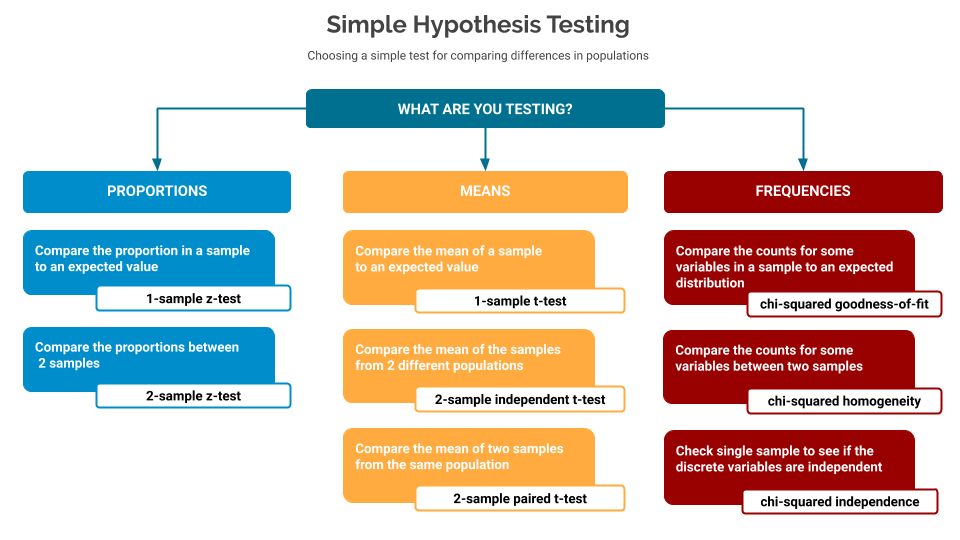

#### 1-sample z-test

In [58]:
def one_sample_prportion(sample_success,sample_size,null_hypothesis):
    significance = 0.05
    # check our sample against Ho for Ha > Ho
    # for Ha < Ho use alternative='smaller'
    # for Ha != Ho use alternative='two-sided'
    stat, p_value = proportions_ztest(count=sample_success, nobs=sample_size, value=null_hypothesis, alternative='larger')
    # report
    print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
    if p_value > significance:
       print ("Fail to reject the null hypothesis - we have nothing else to say")
    else:
       print ("Reject the null hypothesis - suggest the alternative hypothesis is true")

#### 2_sample z-test

In [15]:
def two_sample_proportion_test(sample_success_a,sample_success_b,sample_size_a,sample_size_b):
    successes = np.array([sample_success_a, sample_success_b])
    samples = np.array([sample_size_a, sample_size_b])
    stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

    # report
    print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
    significance = 0.05
    if p_value > significance:
       print ("Fail to reject the null hypothesis - we have nothing else to say")
    else:
       print ("Reject the null hypothesis - suggest the alternative hypothesis is true")